#<h1><center>**Retreival Augmented Generation (RAG)**</center></h1>
---
#<h2><center>*Grgur Živković*</center></h2>
#<h3><center>*February, 2024*</center></h3>

The challenge ->  *Large Language Models (LLMs)*, like ChatGPT, Gemini (and many others) are getting better at answering your questions every day. But they still have some weaknesses:  
*   Knowing stuff about specific topics (domain knowledge)
*   Keeping their information up-to-date (staying current)

One solution to these problems is  ***RAG* (Retrieval Augmented Generation)**:


*   '*Augmented Generation*' -> The idea is to take a pre-trained model (one that already understands language and can answer questions) and "boost" its prompt with relevant information it wouldn't normally have access to. With this extra info, the model can use its language skills to craft a more comprehensive answer.
*   '*Retrieval*' ->  Where does this extra info come from? All sorts of places! PDFs, Word docs, Excel sheets, even code (SQL) and web pages (HTML, XML). Depending on the source, different algorithms can be used to efficiently extract the good stuff from these documents.





### 1. INSTALATION

**Important note:** Make sure to set the *runtime* to a  **T4 GPU**.

*   llama-cpp-python -> This tool is used to run LLMs locally.  

To run an LLM using a GPU, you'll need to use the following command:  







In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 12.1 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 8.8 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 30.7 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.3 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.3 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.4 MB/s eta 0:00:00
    Creating /tmp/pip-build-env-se7zn9pw/overlay/local/bin
    changing mode of /tmp/pip-build-env-se7zn9pw/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-se7zn9pw/overlay/l

In [2]:
!pip install -qU  langchain langchain-community langchainhub gpt4all chromadb pymupdf huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━



1.   Langchain -> Framework used for building RAG workflows.
2.   GPT4All -> A library used for the local embedder. (An embedder helps   convert text into a numerical representation for the model to understand.)
3.   ChromaDB -> A vector database used to store and retrieve information efficiently.
4.   PyMuPDF -> A python module used for working with PDF documents.



In [7]:
# IMPORTS

# For PDF handling
import fitz

import os
from uuid import uuid4
from operator import itemgetter
import re # ReGex
import numpy as np

# LangChain docs: (https://python.langchain.com/docs/get_started/introduction)
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.embeddings import GPT4AllEmbeddings
from langchain_community.llms import GPT4All, LlamaCpp
from langchain_community.document_loaders import PyMuPDFLoader, DirectoryLoader
from langchain.prompts import PromptTemplate
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

from huggingface_hub import hf_hub_download

### 2. LLM USED FOR INFERENCE

A quantized Llama-2 model from Huggingface is used:
(https://huggingface.co/TheBloke/Llama-2-13B-chat-GGML).


> Why quantized? The original model has 70 bilion parameters, so I went with the quantized version for better performance.


> This means I'm using a version of the model that has been optimized down to 13 billion parameters.




In [4]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

Downloading the model from Huggingface:

In [ ]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

For streaming:

In [8]:
# Callbacks support token-wise streaming
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
# Verbose is required to pass to the callback manager

In [9]:
n_gpu_layers = 40  # Change this value based on your model and your GPU VRAM pool.
n_batch = 512  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.

# Loading model,
llm = LlamaCpp(
    model_path=model_path,
    max_tokens=1024,
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    callback_manager=callback_manager,
    verbose=True,
    n_ctx=4096, # Context window
    stop = ['USER:'], # Dynamic stopping when such token is detected.
    temperature = 0.4,
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


### 3. DATA LOADING

In order to load the PDF document make sure to place it in the right relative path:

In [12]:
# PyMuPDF Loader:
loader = PyMuPDFLoader(r"Intro_To_Machine_Learning(234_pages).pdf")

In [13]:
docs = loader.load()
print(f"Number of PDF document pages: {len(docs)}")

Number of PDF document pages: 234


In [14]:
print(f"Content of 112. page: \n {docs[111]}") # 0 based indexing

Content of 112. page: 
 page_content='104\n3 Optimization\nwrite for any w′ ∈(at, bt)\nJ(w′) −J(w∗) ≤(w′ −w∗) · J′(w′) ≤(bt −at) · J′(U).\n(3.37)\nSince we halve the interval (at, bt) at every iteration, it follows that (bt−at) =\n(U −L)/2t. Therefore\nJ(w′) −J(w∗) ≤(U −L) · J′(U)\n2t\n,\n(3.38)\nfor all w′ ∈(at, bt). In other words, to ﬁnd an ϵ-accurate solution, that is,\nJ(w′) −J(w∗) ≤ϵ we only need log(U −L) + log J′(U) + log(1/ϵ) < t itera-\ntions. An algorithm which converges to an ϵ accurate solution in O(log(1/ϵ))\niterations is said to be linearly convergent.\nFor multi-dimensional objective functions, one cannot rely on the mono-\ntonicity property of the gradient. Therefore, one needs more sophisticated\noptimization algorithms, some of which we now describe.\n3.2.2 Coordinate Descent\nCoordinate descent is conceptually the simplest algorithm for minimizing a\nmultidimensional smooth convex function J : Rn →R. At every iteration\nselect a coordinate, say i, and update\nwt+1 

Each item in the '**docs**' represents a seperate page of the PDF document. These items include the page's text content '**page_content**', and an additional dictionary called '**metadata**'.

In [15]:
docs[111].metadata

{'source': 'Intro_To_Machine_Learning(234_pages).pdf',
 'file_path': 'Intro_To_Machine_Learning(234_pages).pdf',
 'page': 111,
 'total_pages': 234,
 'format': 'PDF 1.4',
 'title': 'AnIntroductiontoMachineLearning',
 'author': 'AlexJ.SmolaandVishyS.V.N.Vishwanathan',
 'subject': '',
 'keywords': '',
 'creator': 'LaTeX with hyperref package',
 'producer': 'pdfTeX-1.40.10',
 'creationDate': "D:20101001154705-07'00'",
 'modDate': "D:20101001154705-07'00'",
 'trapped': ''}

### 4. TEXT SPLITTING


The content of the pages needs to be further divided for better retrieval. There are various methods for splitting text, and here the 'RecursiveCharacterTextSplitter' is used. (https://api.python.langchain.com/en/latest/text_splitter/langchain.text_splitter.RecursiveCharacterTextSplitter.html#)

This method recursively splits the text into a set of predefined symbols so that the resulting separated texts (hereinafter 'documents') have a size of 'chunk_size'. In order to preserve the semantic information of each resulting document, the 'chunk_overlap' parameter is set, which represents the number of symbols that overlap with the content of the adjacent document.


>Excellent visualization of the impact of these parameters:: (https://chunkviz.up.railway.app/#explanation)



In [16]:
# Text Splitting function
def make_document_splits(splitter_method, docs):
  text_splitter = splitter_method(chunk_size=1000, chunk_overlap=200) # This is dumb but keep for now
  splits = text_splitter.split_documents(docs)
  return splits

In [17]:
splits = make_document_splits(RecursiveCharacterTextSplitter, docs)
print(f"Number of document splits: {len(splits)}")

Number of document splits: 561


In [18]:
splits[111]

Document(page_content='"X\ni\nxi\n#\n=\nX\ni\nEXi[xi] and VarX1,...XN\n"X\ni\nxi\n#\n=\nX\ni\nVarXi[xi]\nTo show the second equality assume independence of the Xi.\nProblem 1.6 (Two Dices) Assume you have a game which uses the max-\nimum of two dices. Compute the probability of seeing any of the events\n{1, . . . , 6}. Hint: prove ﬁrst that the cumulative distribution function of the\nmaximum of a pair of random variables is the square of the original cumu-\nlative distribution function.\nProblem 1.7 (Matching Coins) Consider the following game: two play-\ners bring a coin each. the ﬁrst player bets that when tossing the coins both\nwill match and the second one bets that they will not match. Show that even\nif one of the players were to bring a tainted coin, the game still would be\nfair. Show that it is in the interest of each player to bring a fair coin to the\ngame. Hint: assume that the second player knows that the ﬁrst coin favors\nheads over tails.\nProblem 1.8 (Randomized Maxim

In [19]:
splits[111].metadata["page"]

42

Now, the 111th document contains a part of the text from the 43rd page. (Again, using 0-based indexing!)

### 5. VECTOR DATABASE + RETRIEVAL


To obtain relevant data related to the given query using the Language Model (LLM), it is necessary to vectorize both the query and existing documents and store them in a vector database. By comparing the query vector with all other document vectors, a satisfactory measure of similarity is sought. There are several ways to calculate similarity between two vectors. Here, 'similarity_search' is used, which is based on the angle between two vectors. The smaller the angle, the more similar the vectors are.

In [35]:
# The embedder -> GPT4All in this case
embedder = GPT4AllEmbeddings()


The documents are vectorized and saved into a local instance of a vector database (ChromaDB).

In [64]:
vectorstore = Chroma.from_documents(documents=splits, embedding=embedder)

A 'retriever' is defined to perform the task of retrieving documents from the vector database based on the query that is later passed to it.

In [69]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 4}) # This is similarity_search() by default, number of documents returned k=4 by defalt

In [70]:
retr_docs = retriever.invoke("What is gradient descent?")
print(f"The page numbers of retrieved documents: {[doc.metadata['page'] for doc in retr_docs]}")

The page numbers of retrieved documents: [111, 111, 98, 98]


### 6. PROMPTS

The query is the text that is passed to the LLM for inference. For a high-quality response from the LLM, it is necessary to formulate a high-quality query. LLMs are pretrained with certain patterns (styles) of queries, so recommended query patterns can often be found in model information. For simplicity, a simple and popular pattern taken from the langchain hub is used here.

In [71]:
prompt = hub.pull("rlm/rag-prompt")

In [72]:
prompt.pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


It can be seen that in addition to hard-coded text, there are also variables dynamically passed to the query. In this case, the variable 'question' represents the posed question, and the variable 'context' represents the content of the retrieved documents most similar to that question. All of this is sent as a complete query to the LLM, which should then provide a coherent response.

The following is an example of a custom prompt:

In [73]:
template = """You are a helpful instructor who knows that students need precise
and terse feedback, along with clear explanations.Provide the student with neccessary
corrections and suggestions about potential improvements of their answer based on
the given context. Stick to your task, avoid pleasantries. If the provided context
isn't informative enough to provide feedback, say you are not sure or that you don't know.

Based on the following context of the study material:

Context: {context}

the student has been given a question:

Question: {question}

and this is the student answer:

Student Answer: {answer}

Feedback:
"""
custom_prompt_feedback = PromptTemplate.from_template(template)

In [74]:
custom_prompt_feedback.pretty_print()

You are a helpful instructor who knows that students need precise
and terse feedback, along with clear explanations.Provide the student with neccessary
corrections and suggestions about potential improvements of their answer based on
the given context. Stick to your task, avoid pleasantries. If the provided context
isn't informative enough to provide feedback, say you are not sure or that you don't know.

Based on the following context of the study material:

Context: {context}

the student has been given a question:

Question: {question}

and this is the student answer:

Student Answer: {answer}

Feedback:



### 7. LANGCHAIN


The essence of Langchain as a framework is chaining individual elements in a simple manner. At each intersection of the chain, it is easy to access the output value of the last element of the newly formed chain. This defines the RAG workflow and promotes the reusability of individual elements.

In [75]:
# Helper function for concatenating the content of retrieved documents (no need to pass metadata in the query)
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [76]:
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

An example chain that allows receiving multiple parameters in the prompt and defines the exact parameter based on which the document retrieval is performed. In this case, it's the 'question' parameter.

In [77]:
rag_chain_example = (
    {
        "context": itemgetter("question") | retriever | format_docs,
        "question": itemgetter("question"),
        "answer": itemgetter("answer"),
    }
    | custom_prompt_feedback
    | llm
    | StrOutputParser()
)

### 8. INFERENCE

Finally, a specific query is posed to the LLM, and by traversing through the entire chain, an answer to the posed question is obtained.

In [91]:
response = rag_chain.invoke("""What is gradient descent?""")

Llama.generate: prefix-match hit


 Gradient descent is an optimization technique used to minimize multidimensional smooth convex objective functions of the form J : Rn →R. It involves iteratively adjusting the location of the variables in the direction of the negative gradient of the function, with the goal of finding the global minimum of the function.

### 9. CITACIJE

In [86]:
input_pdf_file_path_intro = r"Intro_To_Machine_Learning(234_pages).pdf"
output_pdf_file_path_intro = r"Intro_To_Machine_Learning(234_pages) - highlighted.pdf"

Reminder -> number of pages of retrieved documents for the given query:

In [88]:
page_numbers = [doc.metadata["page"] for doc in retr_docs]
page_numbers

[111, 111, 98, 98]

Function that highlights the content of retrieved documents in the original PDF document and then saves a new highlighted PDF document.

In [84]:
def highlight_pdf(input_pdf_file_path, retr_docs, output_pdf_file_path):

    doc = fitz.open(input_pdf_file_path)

    for _, retr_doc in enumerate(retr_docs):

        cont_splits = retr_doc.page_content.split("\n")

        page = doc[retr_doc.metadata["page"]]

        for cont_split in cont_splits:
            for rect in page.search_for(f"{cont_split}"):
                # Add a highlight annotation for each occurrence
                page.add_highlight_annot(rect)

    doc.save(output_pdf_file_path)
    doc.close()

In [89]:
highlight_pdf(input_pdf_file_path_intro, retr_docs, output_pdf_file_path_intro)

The new highlighted document is saved. By opening the new document, you can navigate to one of the relevant pages [112, 99] and see the highlighted text. (Note that the page number is taken as the page number of the PDF document, not the page number from the original text)

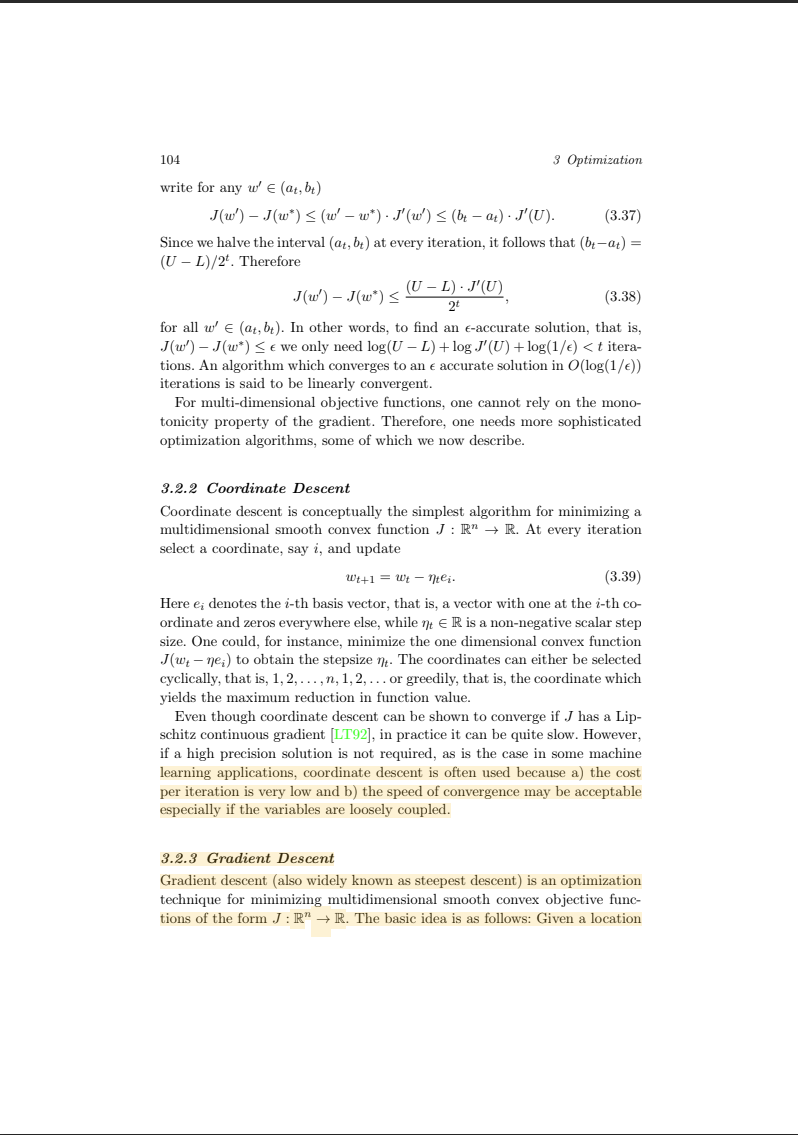